In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import numpy as np

rcParams["figure.figsize"] = (18, 6)

In [2]:
df = pd.read_csv("data/bbas3_info.csv")
df["Date"] = pd.to_datetime(df["Date"])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1986 non-null   datetime64[ns]
 1   BBAS3   1986 non-null   float64       
 2   SELIC   1986 non-null   float64       
 3   Cambio  1986 non-null   float64       
 4   IPCA    1986 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 77.7 KB


In [4]:
df.index = df["Date"]

In [5]:
bb_series = df["BBAS3"]
bb_series

Date
2017-01-02     8.264061
2017-01-03     8.642155
2017-01-04     8.597146
2017-01-05     8.576143
2017-01-06     8.669160
                ...    
2024-12-20    23.829037
2024-12-23    23.670704
2024-12-26    23.947786
2024-12-27    23.858725
2024-12-30    23.918098
Name: BBAS3, Length: 1986, dtype: float64

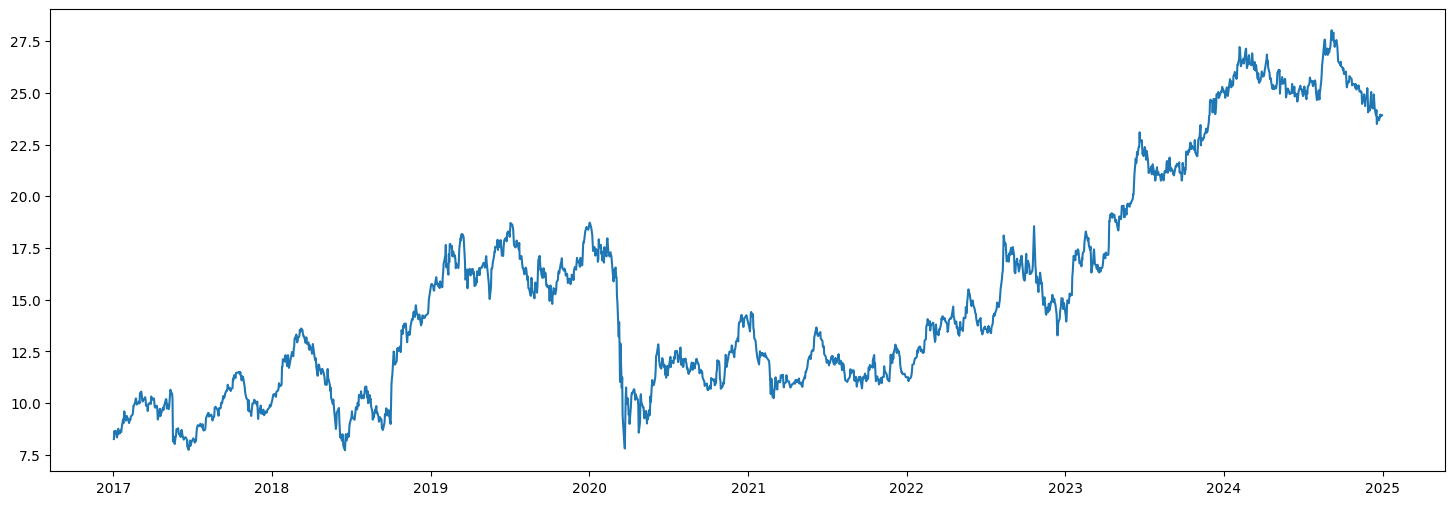

In [6]:
plt.plot(bb_series)
plt.show()

In [7]:
# Decomposição da série Temporal em seus componentes (Tendência, Sazonal e Resíduos)
from statsmodels.tsa.seasonal import seasonal_decompose

# decompa = seasonal_decompose(bb_series, model="additive", period=5)  # Método aditivo
decompa = seasonal_decompose(bb_series, model="multiplicative", period=5) # Método multiplicativo

print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

Date
2017-01-02          NaN
2017-01-03          NaN
2017-01-04     8.549733
2017-01-05     8.565337
2017-01-06     8.528129
                ...    
2024-12-20    23.716225
2024-12-23    23.789454
2024-12-26    23.844870
2024-12-27          NaN
2024-12-30          NaN
Name: trend, Length: 1986, dtype: float64
Date
2017-01-02    1.000312
2017-01-03    0.999966
2017-01-04    0.999207
2017-01-05    1.000498
2017-01-06    1.000018
                ...   
2024-12-20    0.999966
2024-12-23    0.999207
2024-12-26    1.000498
2024-12-27    1.000018
2024-12-30    1.000312
Name: seasonal, Length: 1986, dtype: float64
Date
2017-01-02         NaN
2017-01-03         NaN
2017-01-04    1.006343
2017-01-05    1.000764
2017-01-06    1.016519
                ...   
2024-12-20    1.004791
2024-12-23    0.995798
2024-12-26    1.003817
2024-12-27         NaN
2024-12-30         NaN
Name: resid, Length: 1986, dtype: float64


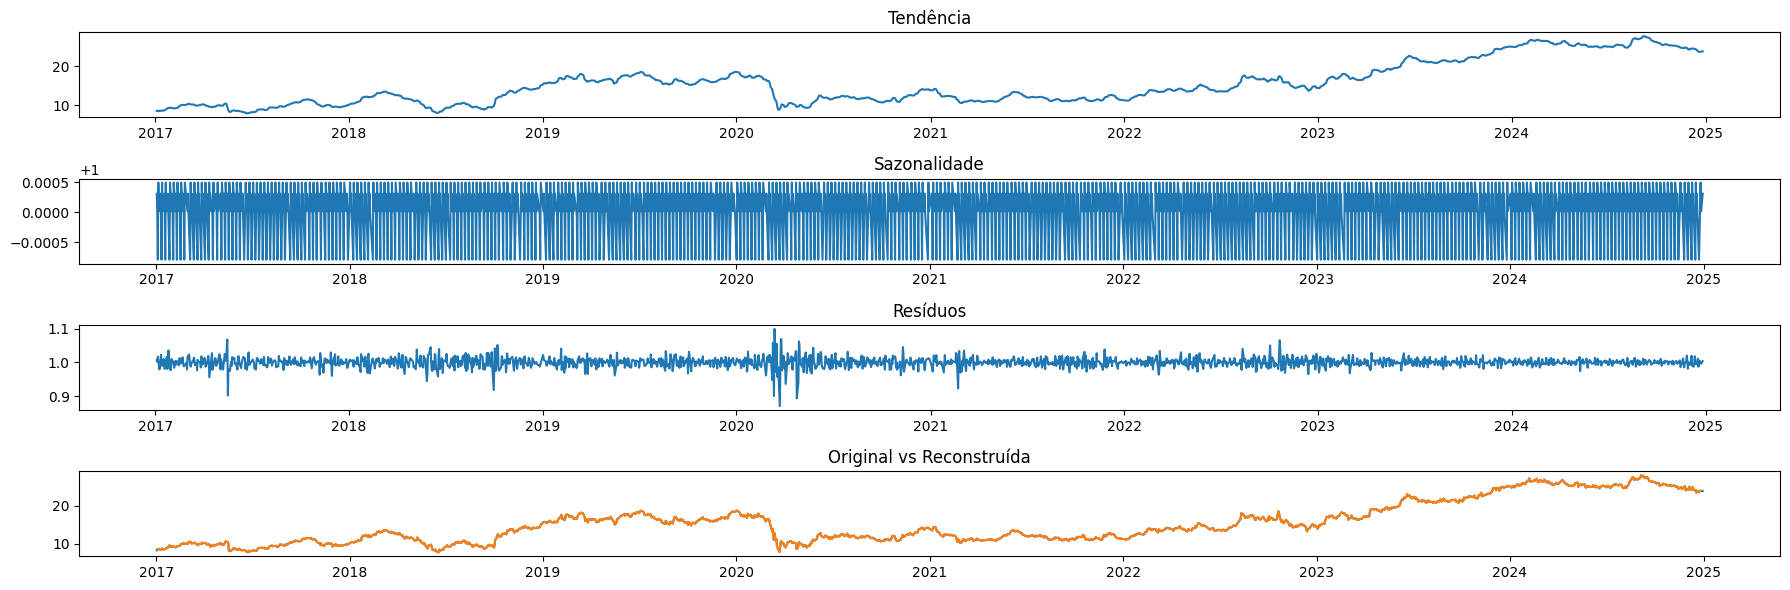

In [8]:
# Plotando as séries

plt.subplot(4, 1, 1)
plt.plot(decompa.trend)
plt.title("Tendência")

plt.subplot(4, 1, 2)
plt.plot(decompa.seasonal)
plt.title("Sazonalidade")

plt.subplot(4, 1, 3)
plt.plot(decompa.resid)
plt.title("Resíduos")

plt.subplot(4, 1, 4)
plt.plot(bb_series, label="Original")
plt.plot(decompa.trend * decompa.seasonal * decompa.resid, label="Reconstruída")
plt.title("Original vs Reconstruída")

plt.tight_layout()
plt.show()

In [9]:
bb_pos_2021 = bb_series[bb_series.index.year >= 2021]

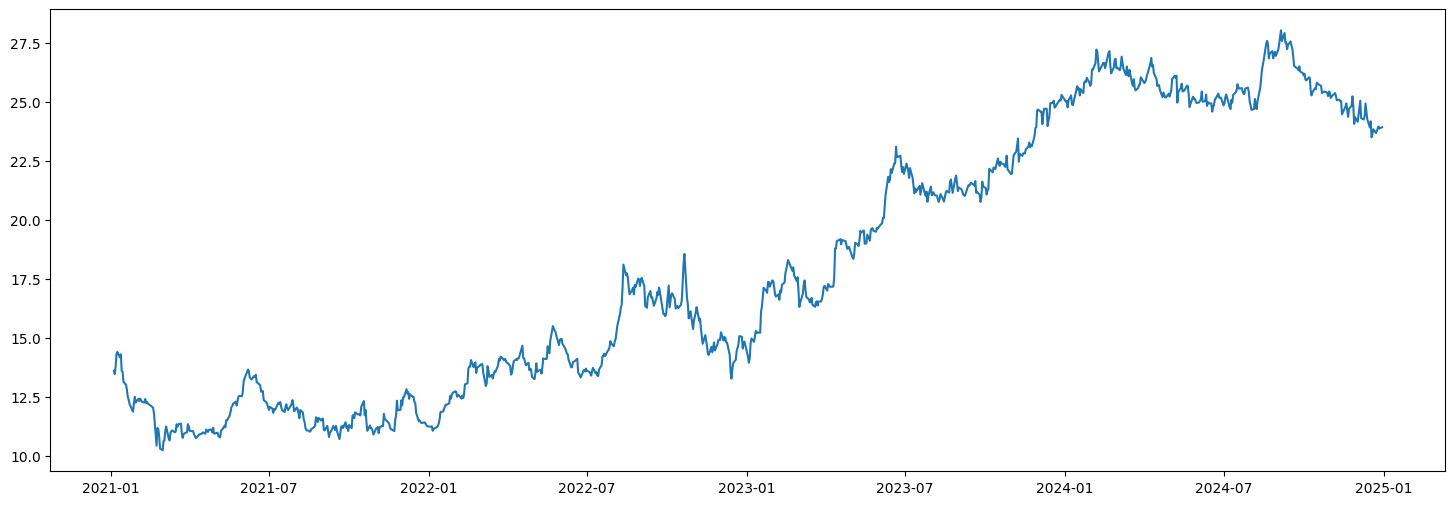

In [10]:
plt.plot(bb_pos_2021)
plt.show()

In [11]:
# Decomposição da série Temporal em seus componentes (Tendência, Sazonal e Resíduos)
from statsmodels.tsa.seasonal import seasonal_decompose

# decompa = seasonal_decompose(bb_series, model="additive", period=5)  # Método aditivo
decompa = seasonal_decompose(bb_pos_2021, model="multiplicative", period=4) # Método multiplicativo

print(decompa.trend)
print(decompa.seasonal)
print(decompa.resid)

Date
2021-01-04          NaN
2021-01-05          NaN
2021-01-06    13.894045
2021-01-07    14.081411
2021-01-08    14.234834
                ...    
2024-12-20    23.715235
2024-12-23    23.799349
2024-12-26    23.837696
2024-12-27          NaN
2024-12-30          NaN
Name: trend, Length: 996, dtype: float64
Date
2021-01-04    1.000637
2021-01-05    1.000251
2021-01-06    0.999592
2021-01-07    0.999519
2021-01-08    1.000637
                ...   
2024-12-20    0.999519
2024-12-23    1.000637
2024-12-26    1.000251
2024-12-27    0.999592
2024-12-30    0.999519
Name: seasonal, Length: 996, dtype: float64
Date
2021-01-04         NaN
2021-01-05         NaN
2021-01-06    0.991936
2021-01-07    1.017652
2021-01-08    1.011405
                ...   
2024-12-20    1.005282
2024-12-23    0.993961
2024-12-26    1.004366
2024-12-27         NaN
2024-12-30         NaN
Name: resid, Length: 996, dtype: float64


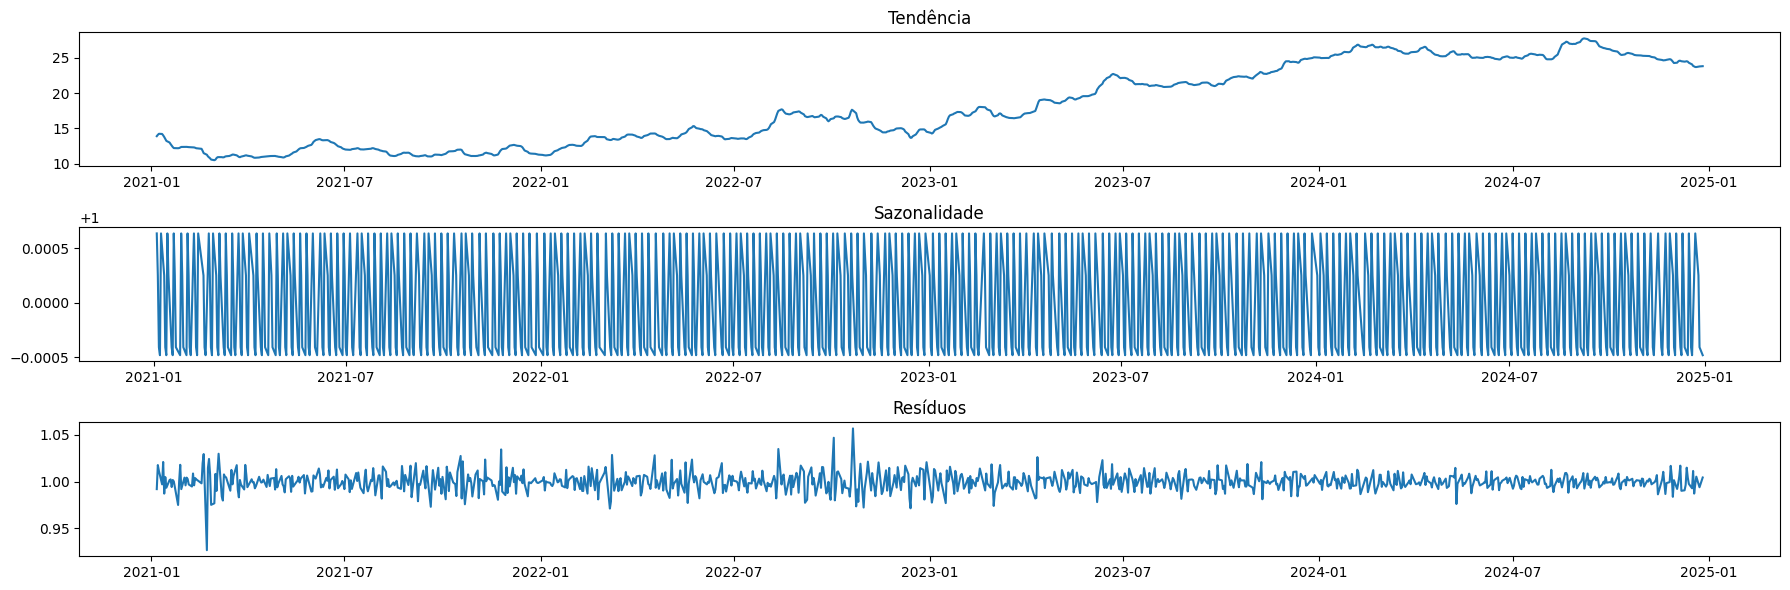

In [12]:
# Plotando as séries

plt.subplot(3, 1, 1)
plt.plot(decompa.trend)
plt.title("Tendência")

plt.subplot(3, 1, 2)
plt.plot(decompa.seasonal)
plt.title("Sazonalidade")

plt.subplot(3, 1, 3)
plt.plot(decompa.resid)
plt.title("Resíduos")

plt.tight_layout()
plt.show()

In [13]:
bb_pos_2024 = bb_series[bb_series.index.year >= 2024]

In [14]:
decompa = seasonal_decompose(bb_pos_2024, model="multiplicative", period=4) # Método multiplicativo

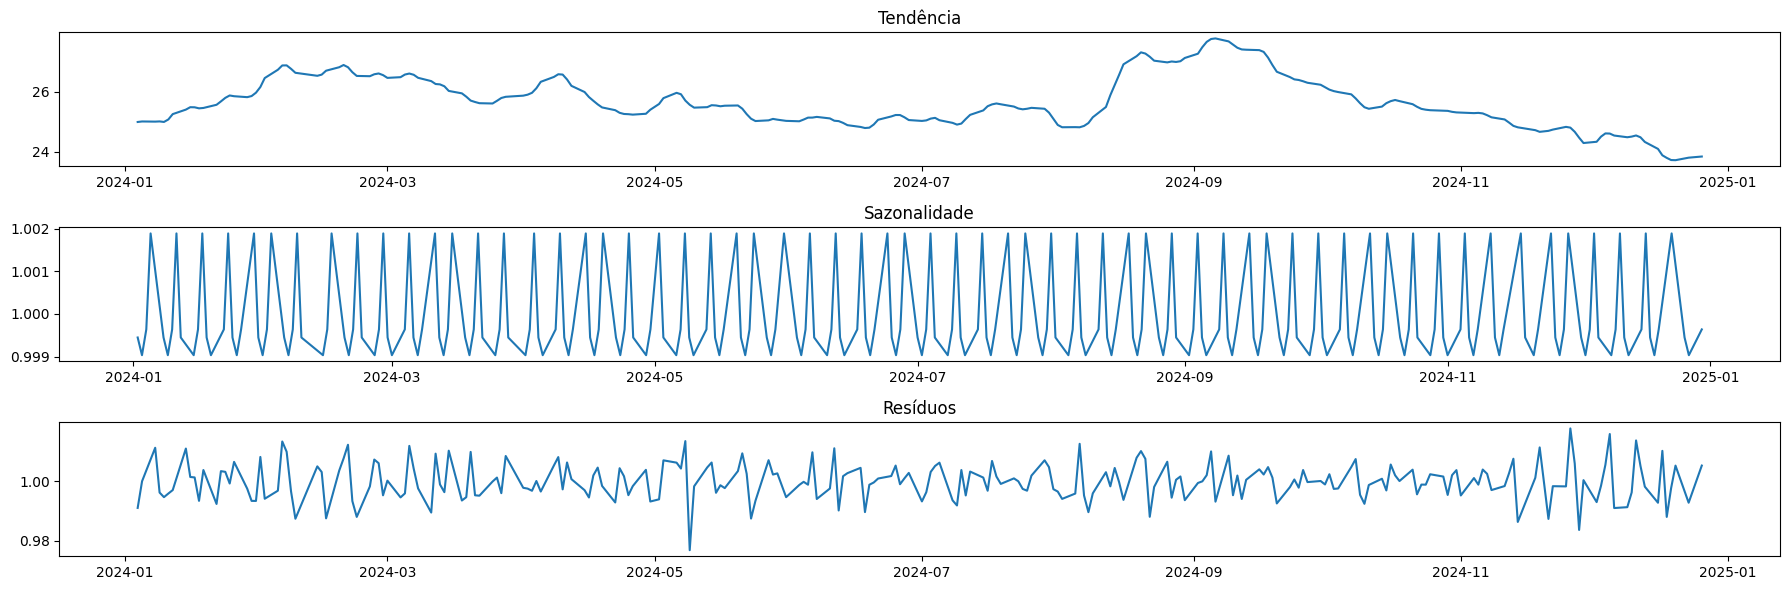

In [15]:
# Plotando as séries

plt.subplot(3, 1, 1)
plt.plot(decompa.trend)
plt.title("Tendência")

plt.subplot(3, 1, 2)
plt.plot(decompa.seasonal)
plt.title("Sazonalidade")

plt.subplot(3, 1, 3)
plt.plot(decompa.resid)
plt.title("Resíduos")

plt.tight_layout()
plt.show()

In [16]:
ma_10d = bb_series.rolling(window=10).mean()
ma_20d = bb_series.rolling(window=20).mean()

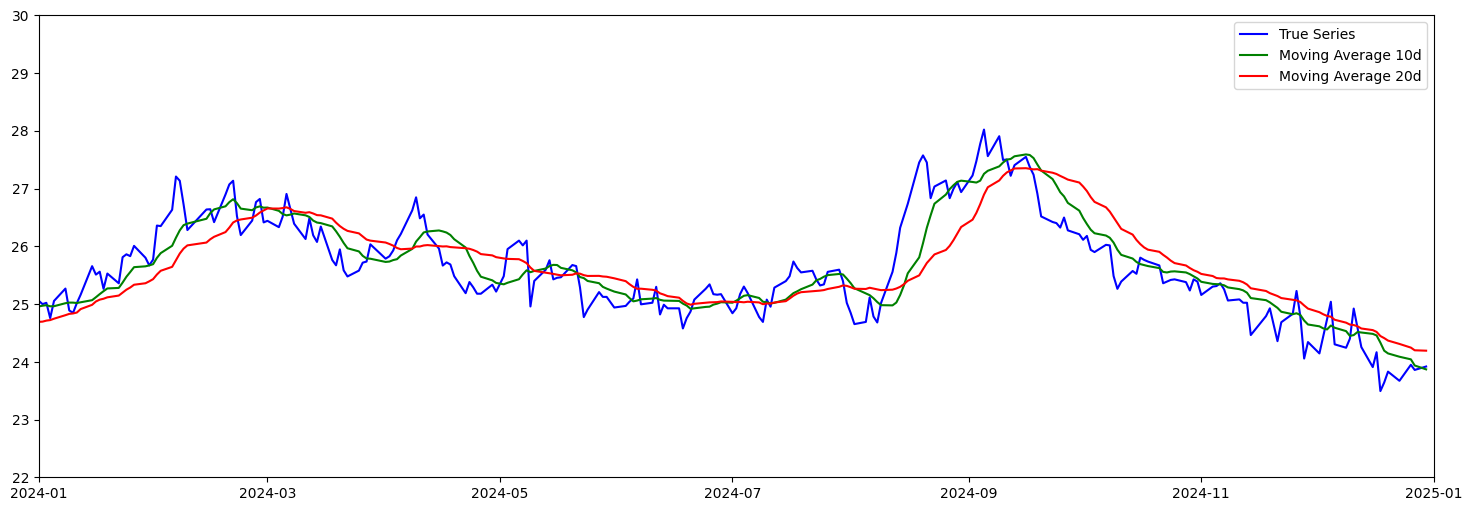

In [17]:
plt.plot(bb_series, 'blue')
plt.plot(ma_10d, 'green')
plt.plot(ma_20d, 'red')
plt.legend(["True Series", "Moving Average 10d", "Moving Average 20d"])
plt.ylim([22, 30])
plt.xlim([pd.Timestamp("2024-01-01"), pd.Timestamp("2025-01-01")])
plt.show()

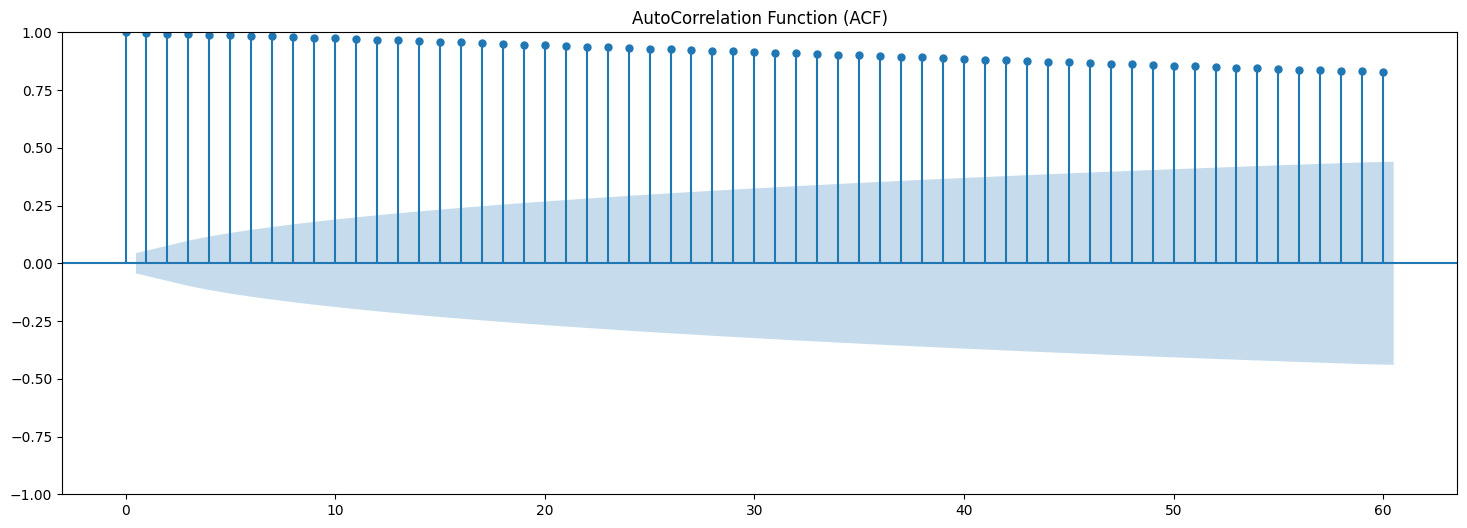

In [18]:
# ACF (AutoCorrelation Function)
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(bb_series, lags=60)
plt.title("AutoCorrelation Function (ACF)")
plt.show()

ACF Decai lentamente -> Indica não estacionariedade

In [19]:
# Teste Dickey-Fuller aumentado (ADF)
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(bb_series)
print(f'ADF Statistic: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}')

ADF Statistic: -1.0731729629196904
p-value: 0.7256508109723925


Teste AD FULLER
- p-value < 0.05 a série é estacionária
- p-value >= 0.05 a série não é estacionária (d > 0 no ARIMA)

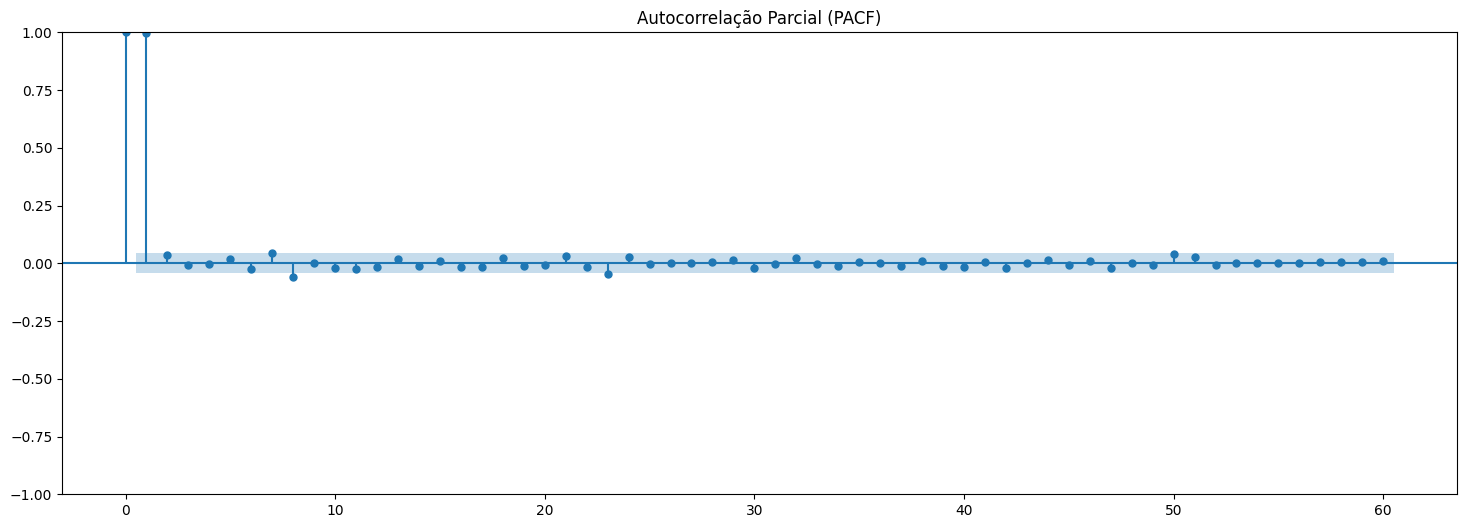

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

# Suponha que sua série já seja estacionária
plot_pacf(bb_series, lags=60, method='ywm')  # 'ywm' = método robusto
plt.title('Autocorrelação Parcial (PACF)')
plt.show()


In [21]:
bb_series_diff = bb_series.diff().dropna()

In [22]:
resultado_adf = adfuller(bb_series_diff)
print(f'ADF Statistic: {resultado_adf[0]}')
print(f'p-value: {resultado_adf[1]}')

ADF Statistic: -16.391866739108472
p-value: 2.689321152033067e-29


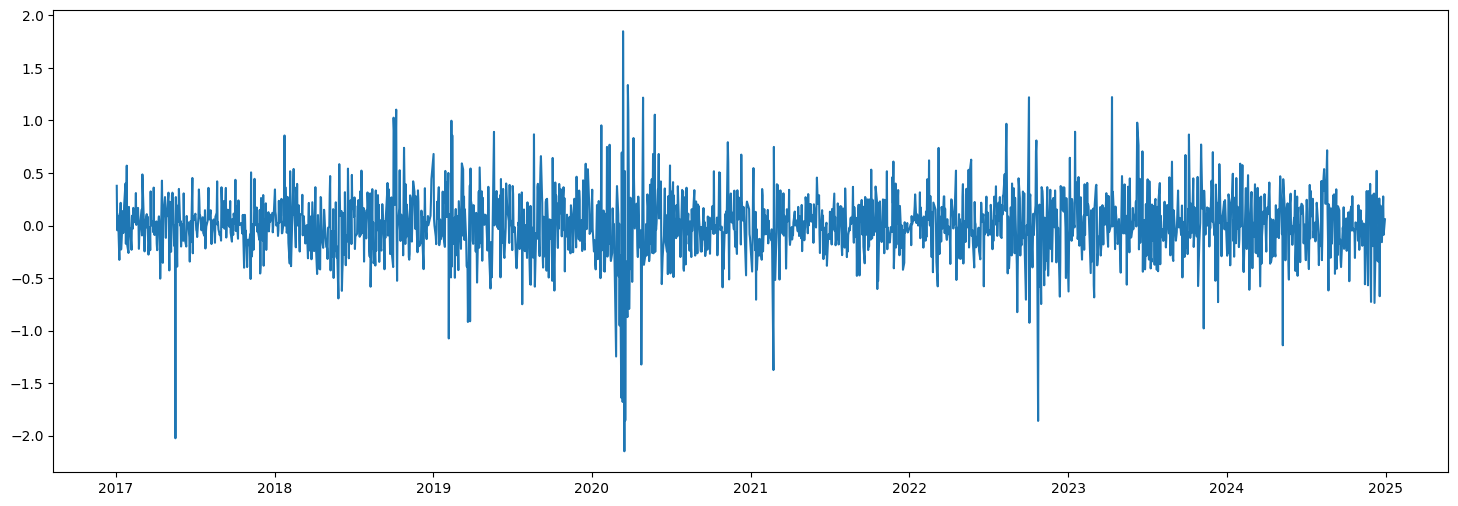

In [23]:
plt.plot(bb_series_diff)

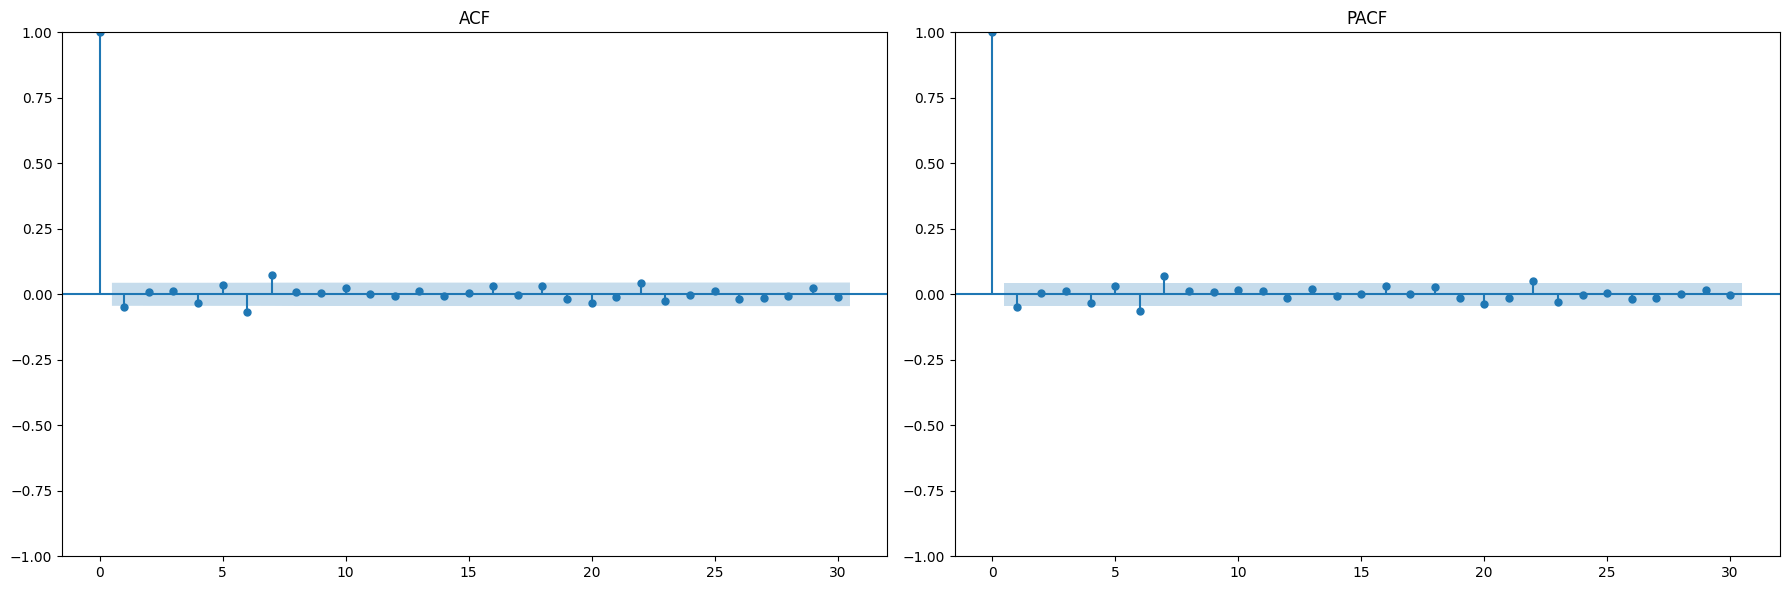

In [24]:
fig, axs = plt.subplots(1, 2)

plot_acf(bb_series_diff, lags=30, ax=axs[0])
axs[0].set_title("ACF")

plot_pacf(bb_series_diff, lags=30, ax=axs[1])
axs[1].set_title("PACF")

plt.tight_layout()
plt.show()

In [36]:
from pmdarima import auto_arima

arima_model = auto_arima(bb_series, trace=True, seasonal=True, stepwise=True)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=949.815, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=946.911, Time=0.16 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=944.205, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=944.278, Time=0.19 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,0)(0,0,0)[0]             : AIC=946.222, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=946.129, Time=0.16 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=946.162, Time=0.18 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=948.121, Time=0.29 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=943.645, Time=0.14 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=945.551, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=945.594, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=943.723, Time=0.09 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=947.495, Time=0.45 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.213 seconds


In [37]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1986
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -469.822
Date:                Mon, 19 May 2025   AIC                            943.645
Time:                        17:32:33   BIC                            954.832
Sample:                             0   HQIC                           947.754
                               - 1986                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0480      0.013     -3.709      0.000      -0.073      -0.023
sigma2         0.0940      0.002     60.815      0.000       0.091       0.097
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2901.12
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
arima_model.resid()

Date
2017-01-02    8.264061
2017-01-03    0.378094
2017-01-04   -0.026866
2017-01-05   -0.023163
2017-01-06    0.092009
                ...   
2024-12-20    0.195143
2024-12-23   -0.149311
2024-12-26    0.269485
2024-12-27   -0.075766
2024-12-30    0.055100
Length: 1986, dtype: float64

In [39]:
type(arima_model)

pmdarima.arima.arima.ARIMA

In [40]:
arima_model.fittedvalues()

Date
2017-01-02     0.000000
2017-01-03     8.264061
2017-01-04     8.624012
2017-01-05     8.599306
2017-01-06     8.577151
                ...    
2024-12-20    23.633893
2024-12-23    23.820015
2024-12-26    23.678301
2024-12-27    23.934491
2024-12-30    23.862998
Length: 1986, dtype: float64

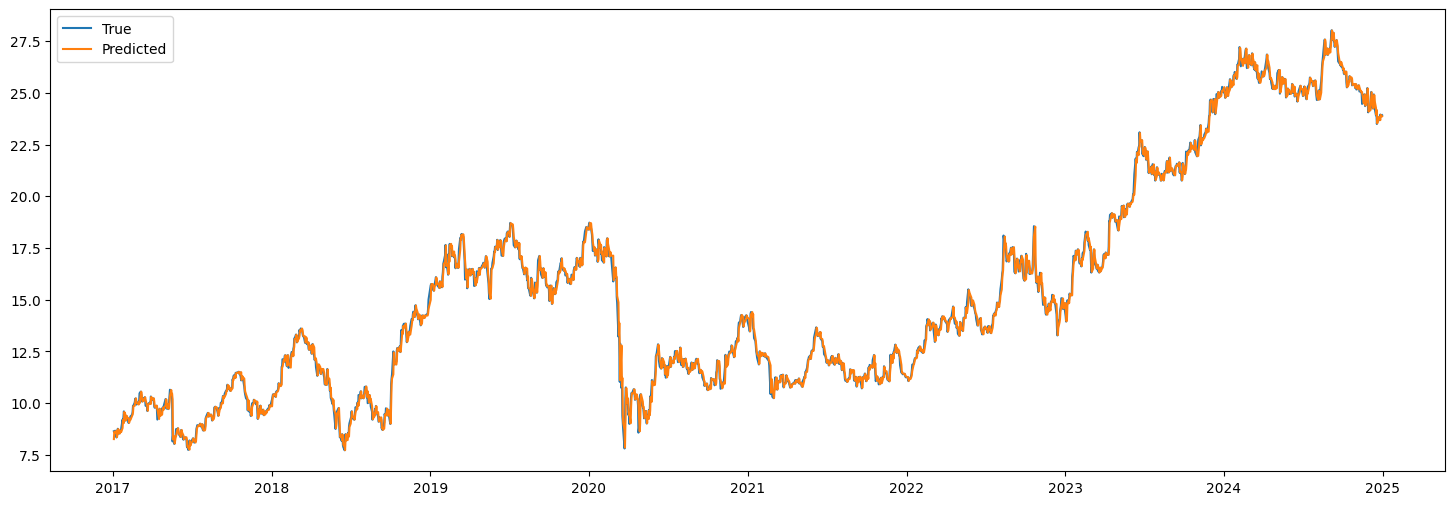

In [42]:
plt.plot(bb_series[1:])
plt.plot(arima_model.fittedvalues()[1:])
plt.legend(["True", "Predicted"])
plt.show()

In [45]:
y_true = bb_series
y_pred = arima_model.fittedvalues()

In [46]:
from sklearn.metrics import mean_absolute_percentage_error, root_mean_squared_error, r2_score

mape = mean_absolute_percentage_error(y_true, y_pred)
rmse = root_mean_squared_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f'MAPE: {mape}\nRMSE: {rmse}\nR²: {r2}')

MAPE: 0.016116269233842285
RMSE: 0.35824107971542296
R²: 0.9954357288759951


In [87]:
len(bb_series)

1986

In [88]:
y_train = bb_series[:1787]
y_test = bb_series[1787:]

In [98]:
from pmdarima import auto_arima

arima_model = auto_arima(y_train, trace=True, m=5, seasonal=True, stepwise=True, max_p=10, max_q=10, max_P=10, max_Q=10)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=890.476, Time=3.22 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=894.116, Time=0.13 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=891.945, Time=0.34 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=892.101, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=894.013, Time=0.07 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,1)[5] intercept   : AIC=891.148, Time=2.36 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,0)[5] intercept   : AIC=890.595, Time=2.14 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(2,0,1)[5] intercept   : AIC=892.111, Time=4.86 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,2)[5] intercept   : AIC=891.764, Time=5.31 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[5] intercept   : AIC=895.191, Time=1.91 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[5] intercept   : AIC=889.992, Time=4.05 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,3)[5] intercept   : AIC=891.286, Time=7.14 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(1,0,3)[5] intercept   : AIC=893.532, Time=8.03 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,2)[5] intercept   : AIC=891.962, Time=2.97 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[5] intercept   : AIC=896.958, Time=0.72 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[5] intercept   : AIC=883.919, Time=5.22 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,1)[5] intercept   : AIC=884.082, Time=3.00 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[5] intercept   : AIC=887.995, Time=5.58 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,3)[5] intercept   : AIC=885.900, Time=8.36 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[5] intercept   : AIC=886.553, Time=3.54 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,3)[5] intercept   : AIC=887.404, Time=8.77 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,2)[5] intercept   : AIC=888.210, Time=3.11 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,2)[5] intercept   : AIC=892.185, Time=3.24 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,2)[5] intercept   : AIC=885.708, Time=7.51 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,2)[5] intercept   : AIC=884.113, Time=5.75 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,2)[5] intercept   : AIC=898.485, Time=1.15 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,2)[5] intercept   : AIC=891.707, Time=6.28 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,2)[5]             : AIC=883.828, Time=2.34 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,1)[5]             : AIC=884.156, Time=1.53 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,2)[5]             : AIC=887.946, Time=2.55 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(0,0,3)[5]             : AIC=885.792, Time=3.45 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,1)[5]             : AIC=886.551, Time=2.03 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,2)(1,0,3)[5]             : AIC=887.920, Time=4.28 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,2)[5]             : AIC=889.499, Time=1.89 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,1)(0,0,2)[5]             : AIC=888.043, Time=1.74 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,2)(0,0,2)[5]             : AIC=892.042, Time=1.28 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(3,1,3)(0,0,2)[5]             : AIC=885.823, Time=2.72 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,2)[5]             : AIC=896.736, Time=1.27 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,3)(0,0,2)[5]             : AIC=883.828, Time=2.56 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,1)(0,0,2)[5]             : AIC=898.396, Time=0.47 sec


c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(4,1,3)(0,0,2)[5]             : AIC=890.725, Time=3.02 sec

Best model:  ARIMA(3,1,2)(0,0,2)[5]          
Total fit time: 136.276 seconds


In [99]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 1787
Model:             SARIMAX(3, 1, 2)x(0, 0, 2, 5)   Log Likelihood                -433.914
Date:                           seg, 19 mai 2025   AIC                            883.828
Time:                                   18:34:34   BIC                            927.730
Sample:                                        0   HQIC                           900.040
                                          - 1787                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6349      0.149    -10.938      0.000      -1.928      -1.342
ar.L2         -0.7398      0.152     -4.856      0.000      -1.038      -0.441
ar.L3          0.0031      0.029      0.107      0.915      -0.053       0.059
ma.L1          1.5963      0.147     10.891      0.000       1.309       1.884
ma.L2          0.6819      0.132      5.165      0.000       0.423       0.941
ma.S.L5       -0.0149      0.023     -0.660      0.509      -0.059       0.029
ma.S.L10       0.0467      0.023      2.018      0.044       0.001       0.092
sigma2         0.0952      0.002     55.979      0.000       0.092       0.099
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2511.78
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.24   Skew:                            -0.46
Prob(H) (two-sided):                  0.01   Kurtosis:                         8.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [100]:
y_pred = arima_model.predict(199)

c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\felip\Felipe\Projetos\TCC\venv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [101]:
print(mean_absolute_percentage_error(y_test, y_pred))

0.04139791379677081


In [102]:
y_pred.index = y_test.index

In [103]:
y_pred

Date
2024-03-18    26.297305
2024-03-19    26.342249
2024-03-20    26.329196
2024-03-21    26.347092
2024-03-22    26.313681
                ...    
2024-12-20    26.316867
2024-12-23    26.316867
2024-12-26    26.316867
2024-12-27    26.316867
2024-12-30    26.316867
Length: 199, dtype: float64

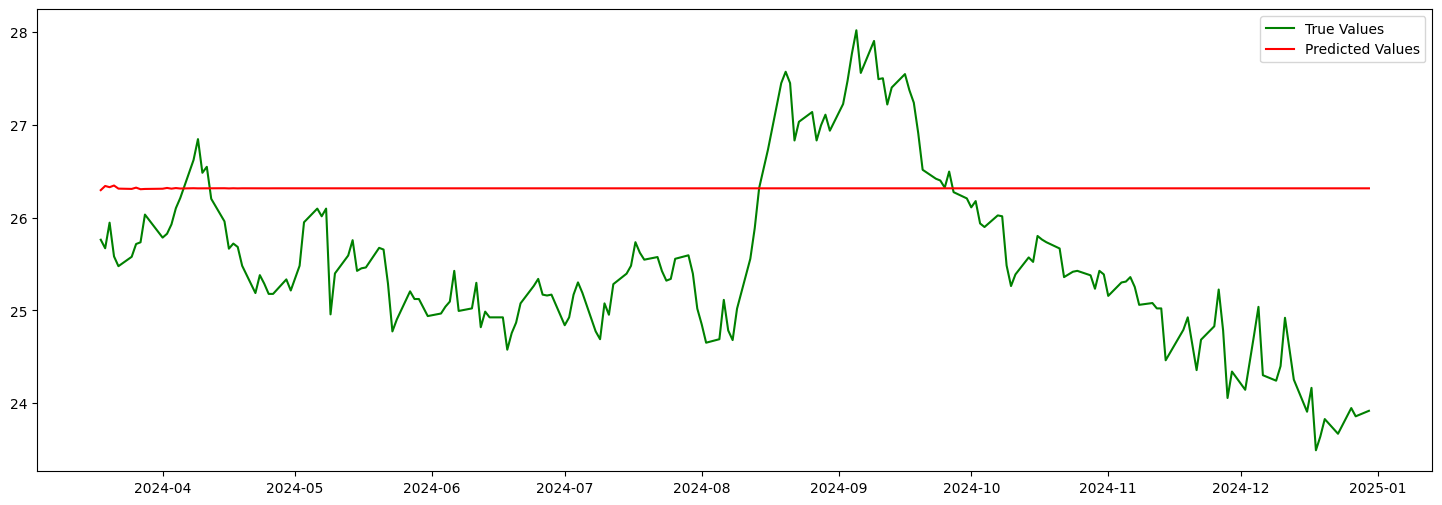

In [106]:
plt.plot(y_test, "green", label="True Values")
plt.plot(y_pred, "red", label="Predicted Values")
plt.legend()
plt.show()